# A larger example (Medical Cost Personal Datasets)
[Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance) from Kaggle.

In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# Let's try one-hot encoding our DataFrame so it's all numerical
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [4]:
# Create X & y values (features and labels)

X = insurance_one_hot.drop("charges", axis=1)
y = insurance["charges"]

In [5]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [6]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [7]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [8]:
# Build a neural network model to predict insurance costs
tf.random.set_seed(42)
# 1. Create a model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 3s 3ms/step - loss: 8720.7207 - mae: 8720.7207
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7889.4243 - mae: 7889.4243
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7580.9565 - mae: 7580.9565
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7549.4946 - mae: 7549.4946
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7681.4668 - mae: 7681.4668
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7596.8838 - mae: 7596.8838
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7570.6118 - mae: 7570.6118
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7692.6274 - mae: 7692.6274
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7568.1064 - mae: 7568.1064
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7693.2925 - mae: 7693.2925

In [9]:
# Check out insurance_model summary
insurance_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8786.2451 - mae: 8786.2451


[8786.2451171875, 8786.2451171875]

In [11]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now, it looks like our model isn't performing very well. Let's try and improve it.

To (try) to improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer.
2. Same as above but, Train for longer.

In [12]:
len(X_train), len(y_train)

(1070, 1070)

In [13]:
# Let's rebuild our model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=[len(X_train.keys())]),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(), # if SGD doesn't work, try Adam
                        metrics=["mae"])

insurance_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               1200      
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 4ms/step - loss: 13289.0391 - mae: 13289.0391
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13119.8955 - mae: 13119.8955
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12773.0029 - mae: 12773.0029
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 12103.4512 - mae: 12103.4512
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 10985.6416 - mae: 10985.6416
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 9544.7207 - mae: 9544.7207
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8206.5195 - mae: 8206.5195
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7543.0654 - mae: 7543.0654
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7428.5908 - mae: 7428.5908
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7407.6689 - mae:

In [15]:
# Check the results of insurance_model_2 on the test data
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4921.8872 - mae: 4921.8872


[4921.88720703125, 4921.88720703125]

Experiment 2: Same as above but, train for longer.

In [16]:
#Set random seed
tf.random.set_seed(42)
# Create the model
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Fit the model
history_3 = insurance_model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 1s 4ms/step - loss: 13313.7402 - mae: 13313.7402
Epoch 2/500
34/34 [==============================] - 0s 4ms/step - loss: 13202.0439 - mae: 13202.0439
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 12952.9258 - mae: 12952.9258
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 12434.7578 - mae: 12434.7578
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 11497.2852 - mae: 11497.2852
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 10127.0361 - mae: 10127.0361
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 8657.5273 - mae: 8657.5273
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 7688.7671 - mae: 7688.7671
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 7449.6377 - mae: 7449.6377
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 7421.5596 - ma

In [17]:
# Check the results of insurance_model_3 on the test data
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3173.3679 - mae: 3173.3679


[3173.367919921875, 3173.367919921875]

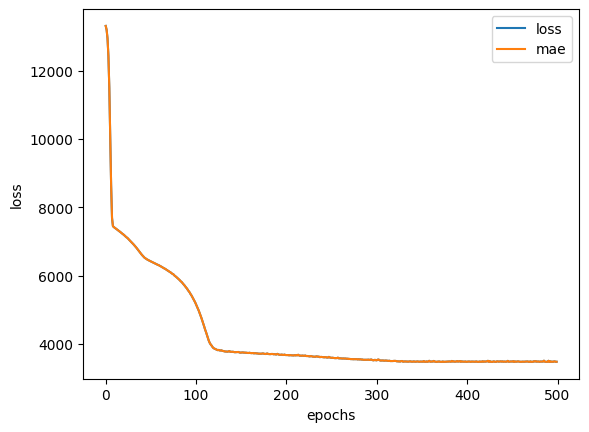

In [18]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

🤔**Question:** How long should you train for?
It's depends. Really... it depends on the problem you're working on. However, if you have a problem where you can measure the performance of a model (such as this one), you can use a technique called **early stopping** callback.

# Preprocessing data (normalization and standardization)